### 시가 생선 계산 서비스 구현

- 주요 학습 : 지도학습 -> 회귀
- 세부 학습 : 선형회귀(LinearRegression)
    * 이유 : 데이터의 분포가 선형관계임

### [1] 데이터 준비 및 확인

In [1]:
filename='../../data/fish.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#  74번~ 129번 => perch 농어 데이터
fishDF=pd.read_csv(filename,
                    header=None, 
                    skiprows=73, 
                    skipfooter=31,
                    usecols=[1, 2],     # 1 - Weight, 2 - Length
                    engine='python')   # skipfooter 매개변수 사용 시 지정

In [4]:
fishDF.columns=['Weight','Length' ]

In [5]:
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [6]:
fishDF.describe()

,Weight,Length
count,56.000000,56.000000
mean,382.239286,27.892857
std,347.617717,9.021668
min,5.900000,8.400000
25%,120.000000,21.825000
50%,207.500000,25.300000
75%,692.500000,36.625000
max,1100.000000,44.000000


### [2] 데이터 분석

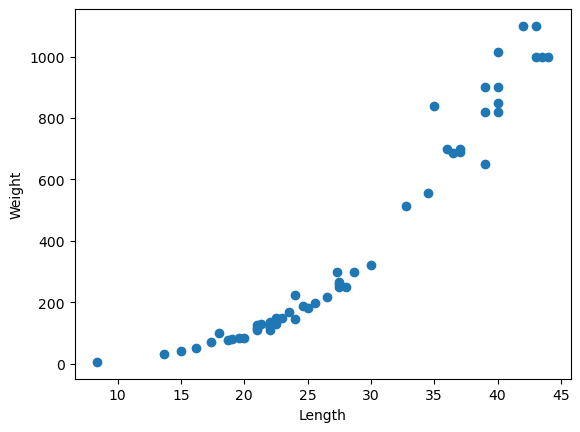

In [7]:
# 시각화해서 확인 
import matplotlib.pyplot as plt

# 수치 데이터의 관계 그래프 => 산점도(scatter)
plt.scatter(fishDF.Length, fishDF.Weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [8]:
# 상관계수 수치과
fishDF.corr()

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


### [3]  데이터 가공

- [3-1] 특성/피쳐 데이터와 타겟 데이터 분리

In [9]:
# 학습 진행 ==> fit(2D, 1D)
# 학습 진행 후 ==> 모델파라미터(Model Parameter) : 기울기/가중치와 절편
# 학습에 사용할 특성 테이터 => 2D
featureDF=fishDF.Length.to_frame()

# 학습에 사용할 타겟 데이터 => 1D
targetDF=fishDF.Weight.copy()

In [10]:
featureDF.head(2), featureDF.index

(   Length
 0     8.4
 1    13.7,
 RangeIndex(start=0, stop=56, step=1))

In [11]:
targetDF.head(2)

0     5.9
1    32.0
Name: Weight, dtype: float64

- [3-2] 훈련용/테스트용 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 기본 : 훈련:테스트 = 75% 25%
# 반환값 : 튜플 형태,  훈련데이터셋과 테스트데이터셋
train_X, test_X, train_y, test_y=train_test_split(  featureDF, 
                                                    targetDF,
                                                    random_state=42)

In [14]:
print(f'train_X :{len(train_X)}개, {train_X.ndim}차원, {train_X.shape}')
print(f'test_X :{len(test_X)}개, {test_X.ndim}차원, {test_X.shape}')

train_X :42개, 2차원, (42, 1)
test_X :14개, 2차원, (14, 1)


### [4] 학습  => 학습방법 즉 문제해결 방법 변경
#### 선형회귀
- 최대한 많은 데이터를 만족하는 선형회귀식을 생성함
    * 방법 : 제공된 데이터와 타겟을 기준으로 선형회귀식을 생성

In [15]:
# 객체 생성 
reg = LinearRegression()

In [16]:
# fit()==> 학습
reg.fit(train_X, train_y)

LinearRegression()

In [17]:
# 학습 후 결정된 파라미터 즉 모델파라미터 확인
f'기울기/가중치 : {reg.coef_}'

'기울기/가중치 : [39.01714496]'

In [18]:
f'절편/바이어스 : {reg.intercept_}'

'절편/바이어스 : -709.0186449535477'

### [5] 평가

In [19]:
train_score = reg.score(train_X, train_y)
test_score =reg.score(test_X, test_y)

In [20]:
print(f'훈  련 결과 점수 : {train_score}' )
print(f'테스트 결과 점수 : {test_score}' )

훈  련 결과 점수 : 0.9398463339976041
테스트 결과 점수 : 0.8247503123313559


### [4] 예측

In [21]:
new_data_=pd.DataFrame([[39.2], [12.7]], columns=['Length'])

pre_y = reg.predict(new_data_)
pre_y.shape

(2,)

In [22]:
pre_y

array([ 820.45343762, -213.50090392])

- 시각화 => 회귀선

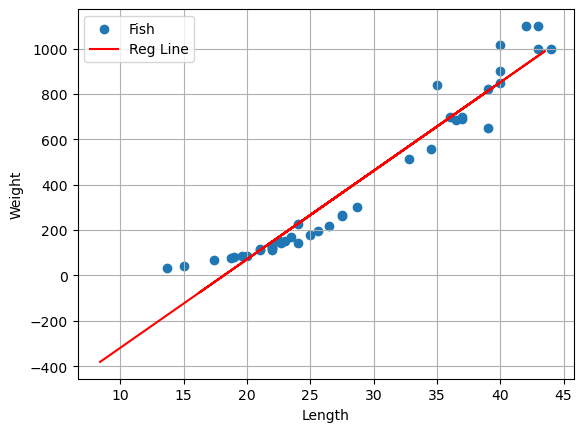

In [23]:
import matplotlib.pyplot as plt

# 수치 데이터의 관계 그래프 => 산점도(scatter)
plt.scatter(train_X, train_y, label='Fish')

# 선형회귀에서 구한 y=ax+b 공식의 직선 긋기
plt.plot(test_X,reg.predict(test_X), 'r-', label='Reg Line')

#plt.plot(new_data_, pre_y, '^g', label='New Data')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.show()

### 다항회귀(Polynominal Regression)

- 여러개의 피쳐/속성을 가진 경우 정확도를 올리기 위해서 사용하는 방식
- 직선의 데이터 분포가 아닌 경우, 곡선으로 많은 데이터를 만족하는 모델 구현
- scikit-learn에는 전용 클래스 없음
    * 대신 전처리 즉 preporcessing 모듈에 피쳐/속성을 n차원 다항으로 변형시켜줌
    * PolynominalFeature 클래스 
    
- 회귀식이 복잡
    * 2차원 다항식 경우  => $y=W_1X_1^2+W_2X_2+W_3X_3+b$

### [1] 피쳐/특성 공학 기반  ==> 특성 증가

- 길이(Length) 피쳐를 증강 ==> 2차원으로 

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
# 차수 변수 
n_degree = 2

In [26]:
# (1) 객체 생성
poly=PolynomialFeatures(degree=n_degree)

In [27]:
# (2) 생성된 다항특성객체에 학습 진행 ===>  주어진 데이터의 피쳐를 2차원 변형
#  => x, x^2 , 1
poly.fit(train_X)

# (3) 변형 하기
poly_train= poly.transform(train_X)
poly_test=poly.transform(test_X)

In [28]:
# 입력한 피쳐 확인
print( poly.feature_names_in_ )

# 생성된 피쳐 확인
print( poly.get_feature_names_out() )

['Length']
['1' 'Length' 'Length^2' 'Length^3' 'Length^4' 'Length^5' 'Length^6'
 'Length^7' 'Length^8' 'Length^9' 'Length^10']


In [29]:
# 변형 전후 형태(shape) 확인
print(f'전 {train_X.shape} ==> 후 {poly_train.shape}')

전 (42, 1) ==> 후 (42, 11)


In [30]:
train_X.head(1)

,Length
8,19.6


In [31]:
poly_train[:1]

array([[1.00000000e+00, 1.96000000e+01, 3.84160000e+02, 7.52953600e+03,
        1.47578906e+05, 2.89254655e+06, 5.66939124e+07, 1.11120068e+09,
        2.17795334e+10, 4.26878854e+11, 8.36682554e+12]])

### [2] 학습 진행

In [32]:
reg3=LinearRegression()

reg3.fit(poly_train, train_y)

LinearRegression()

In [33]:
# 학습 후 기울기/계수 및 절편 확인
reg3.coef_, reg3.intercept_

(array([ 0.00000000e+00, -4.04120745e-04, -7.02851174e-03, -6.91254235e-02,
        -3.48690997e-01,  6.54631821e-02, -5.11447831e-03,  2.12911799e-04,
        -4.96077239e-06,  6.11729771e-08, -3.11457827e-10]),
 627.9276390646894)

### [3] 평가

In [34]:
train_score = reg3.score(poly_train, train_y)
test_score = reg3.score(poly_test, test_y)

In [35]:
print(f'학습점수: {train_score}\n테스트점수: {test_score}')

학습점수: 0.9793731887579084
테스트점수: 0.9164258574094495


### [4] 시각화

In [36]:
# 다항회귀식 ---------------------------------------
x = np.linspace(11, 45)
y = (reg3.coef_[0]*1)+ \
    (reg3.coef_[1]*x)+ \
    (reg3.coef_[2]*(x**2)) + reg3.intercept_

In [37]:
x[:5], y[:5]

(array([11.        , 11.69387755, 12.3877551 , 13.08163265, 13.7755102 ]),
 array([627.07274382, 626.96178703, 626.84406227, 626.71956953,
        626.5883088 ]))

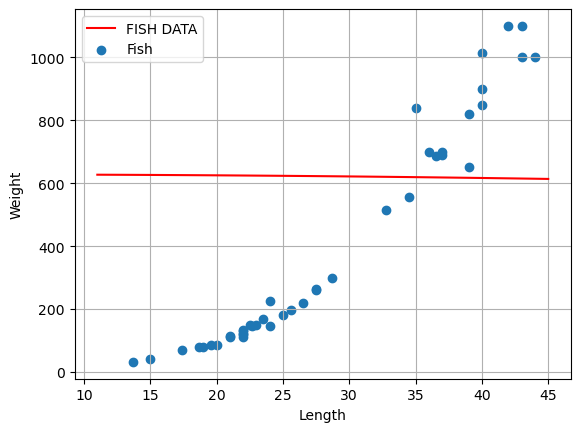

In [38]:
plt.plot(x, y, 'r', label='FISH DATA')
plt.scatter(train_X, train_y, label='Fish')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.show()

In [39]:
train_X_=train_X.sort_values(by='Length')

### 예측 => predict()

In [40]:
test_X.shape

(14, 1)

In [41]:
reg3.predict(poly.transform(test_X))

array([ 308.9760899 ,   64.20005101,  262.8337537 ,  120.5803201 ,
        138.47848906,  878.41682381,  389.37987325,  174.36863911,
        808.00604973,  115.95702683, 1059.72640875,   37.5860085 ,
        284.69646638,  254.65222071])

### 과대적합(Overfitting)에 대한 해결 방안

- 선형회귀에서 발생하는 과대적합을 해결하기 위한 방법 제공
    * 비슷비슷한 중요도의 특성/피쳐의 경우 선택 어려움 ==> 과대적합 발생
    * 알고리즘을 통해서 해결하고자 함
        - 릿지(Ridge) : 큰 W를 약하게 만들어서 과대적합을 해소하겠다는 방법(L2)
        - 라쏘(Lasso) : 영향이 약한 특성/피쳐에 W를 0으로 만들어서 주는 방법(L1)

### Ridge Regresssion 

In [42]:
from sklearn.linear_model import Ridge, Lasso

In [43]:
# 규제 강도 변수 -----------------------------------------------
alpha_ = 10000

In [44]:
# Ridge 학습 모델 객체 생성
rgModel = Ridge(alpha=alpha_)

In [45]:
# 학습 진행 =>  Loss/Cost Func() 오차 + (알파*W**2)
rgModel.fit(poly_train, train_y)

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.13114e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=10000)

In [46]:
# 평가 진행
train_score = rgModel.score(poly_train, train_y)
test_score  = rgModel.score(poly_test, test_y)

In [47]:
train_score, test_score

(0.979335579090795, 0.9465289342940713)